# Simple Regression Problem

### How to create the model?
- Read the dataset
- Define the features and labels
- Encode the dependent variable
- Divide the dataset into two parts:
    - Training
    - Testing
- Tensorflow data structure for holding features, labels, etc.
- Implement the model
- Train the model
- Make prediction on the test data <br>

(END)

### How to increase the efficiency of the Model?
- Firstly, we create a model (as done above).
- Then, we calculate the loss. (A loss function measures how far apart the current model is from the provided data.)
- Then, Update the Variables and repeat the previous step until we converge.

### Calculating the loss
In order to understand how good the model is, we should know the loss/error. Following steps are followed in doing this process:
- To evaluate the model on training data, we need a y, i.e., placeholder to provide the desired values.
- Now, for evaluating the loss, we will define the loss function.
- Then, we will calculate the loss for all data.

### Reducing the Loss (Optimizer)
Optimizer modifies each variable according to the magnitude of the derivative of loss with respect to that variable. Here, we are going to use `Gradient Descent` Optimizer.

### Steps of Building a Neural Network
- Build a Graph
- Initiate the Session
- Feed Data In and get Output
- Afterwards we can add in the cost function in order to train your network to optimize the parameters

### Problem-1

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# data with linearly-spaced b/w 0 and 10 with the addition of some noise to the data.

# uniform -> every value in the range a and b has a likely chance of getting choosen.

x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [3]:
# label - linearly spaced.

y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

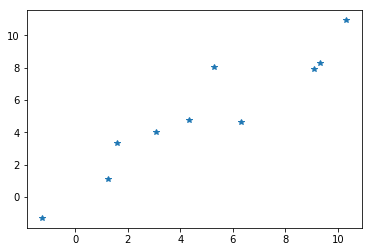

In [4]:
# Represent the dataset

plt.plot(x_data, y_label, '*')

In [5]:
# Variable parameters for the model to train

m = tf.Variable(np.random.rand())
c = tf.Variable(np.random.rand())

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Calculating the loss (or cost)

error = 0
for x, y in zip(x_data, y_label):
    y_hat = m * x + c
    error += (y - y_hat) ** 2

In [7]:
# Optimizing the cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
optimize = optimizer.minimize(error)

In [8]:
# Initialize the Variables
init = tf.global_variables_initializer()

In [9]:
# Evaluating the model

epochs = 10
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        sess.run(optimize)
    final_m, final_c = sess.run([m, c])

In [10]:
# Visualize the trainable parameters 

print(final_m, final_c)

0.94055176 0.40669736


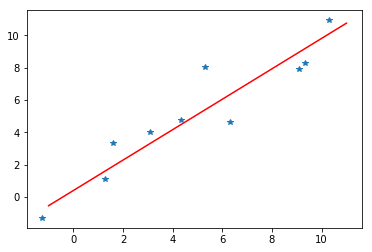

In [11]:
# Visualizing the test set results

x_test = np.linspace(-1, 11, 10)
y_pred = final_m * x_test + final_c
plt.plot(x_test, y_pred, 'r')
plt.plot(x_data, y_label, '*')


### Problem-2

In [45]:
# After importing the libraries define Dataset values

X_data = [1,2,3,4]
Y_label = [0,-1,-2,-3]

In [50]:
# Make the model parameters

W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

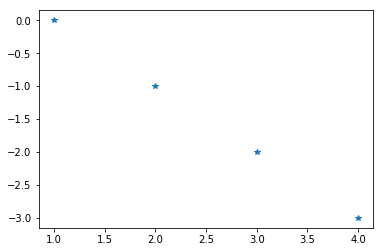

In [51]:
# Visualize the Dataset

plt.plot(X_data, Y_label, '*')

In [52]:
# Make the model

Y_hat = W*X + b

In [53]:
# Initializing the Variables

init = tf.global_variables_initializer()

In [59]:
# Calculating the loss (or cost) of the model and then Reducing the loss (or cost) - Optimization

epcohs = 1000
with tf.Session() as sess:
    sess.run(init)
    
    squared_deltas = tf.square(Y_hat - Y)
    loss = tf.reduce_sum(squared_deltas)
    print('loss: ', sess.run(loss, {X: [1,2,3,4], Y: [0,-1,-2,-3]}))
    
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = optimizer.minimize(loss)
    for i in range(epcohs):
        sess.run(train, {X: X_data, Y: Y_label})
        final_W, final_b = sess.run([W, b])
    print('final_W: ', final_W, '\tfinal_b: ', final_b)

loss:  0.17928126
final_W:  -0.9999991 	final_b:  0.99999744


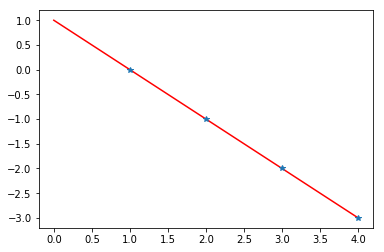

In [60]:
# Visualizing the test set results

X_test = np.linspace(0, 4, 10)
Y_pred = final_W * X_test + final_b

plt.plot(X_test, Y_pred, 'r')
plt.plot(X_data, Y_label, '*')